# Linear Programming (Optimization)
taks from [Optimize with Python by APMonitor.com](https://www.youtube.com/watch?v=gec5YQckkE0)

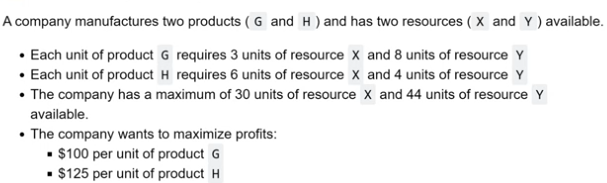

G & H are product lables and $x_G$ and $x_H$ are variables- number of products.

lets assume we can produce $x_G$ of G and $x_H$ of H. It will consume amounts of X and Y:

* $tot_X + tot_Y = x_G (3 X + 8 Y) + x_H (6 X + 4 Y) = (3 x_G + 6 x_H) X + (8 x_G + 4 x_H) Y$

but we have a limit:

* $
\begin{cases}
      tot_X \leq 30 \\ tot_Y \leq 44
\end{cases}
$

so,

* $
\begin{cases}
      3 x_G + 6 x_H \leq 30 \\ 8 x_G + 4 x_H \leq 44
\end{cases}
\rightarrow
\begin{bmatrix}
3 & 6 \\ 8 & 4
\end{bmatrix}
\begin{bmatrix}
x_G \\ x_H
\end{bmatrix}
\leq
\begin{bmatrix}
30 \\ 44
\end{bmatrix}
\rightarrow
A_{ub}x = b_{ub}
$

we want to maximize:
* $
f_{max} = 100 x_G + 125 x_H = 
\begin{bmatrix}
100 & 125
\end{bmatrix}
\begin{bmatrix}
x_G \\ x_H
\end{bmatrix}=
c^Tx
$

or minimize:
* $f_{min} = -f_{max}$

and we cannot 'destroy' products:
* $x_G, x_H \geq 0$
* $A_{ub} = 
\begin{bmatrix}
3 & 6 \\ 8 & 4
\end{bmatrix}$

## Scipy linprog:

* _scipy.optimize.linprog(c, A_ub=None, b_ub=None, A_eq=None, b_eq=None, bounds=None, method='highs', callback=None, options=None, x0=None, integrality=None)_

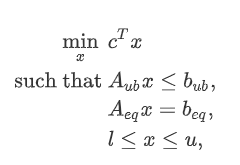

Thus:
* $c = -1
\begin{bmatrix}
100 \\ 125
\end{bmatrix}$
* $b_{ub} = 
\begin{bmatrix}
30 \\ 44
\end{bmatrix}; b_{eq} = $ None

* $A_{ub} = 
\begin{bmatrix}
3 & 6 \\ 8 & 4
\end{bmatrix}; A_{eq} = $ None

* $l = 0; u = $ None

In [1]:
from scipy.optimize import linprog

c = [-100,-125]
b_ub = [30,44]
A_ub = [[3,6],[8,4]]
bounds = [(0,None)]*2
res = linprog(c=c,A_ub=A_ub,b_ub=b_ub,bounds= bounds, method='highs')
display(res)
print(r'$(x_G, x_H) = $', res.x)
print('Profit = ', - res.fun, '$')

        message: Optimization terminated successfully. (HiGHS Status 7: Optimal)
        success: True
         status: 0
            fun: -775.0
              x: [ 4.000e+00  3.000e+00]
            nit: 2
          lower:  residual: [ 4.000e+00  3.000e+00]
                 marginals: [ 0.000e+00  0.000e+00]
          upper:  residual: [       inf        inf]
                 marginals: [ 0.000e+00  0.000e+00]
          eqlin:  residual: []
                 marginals: []
        ineqlin:  residual: [ 0.000e+00  0.000e+00]
                 marginals: [-1.667e+01 -6.250e+00]
 mip_node_count: 0
 mip_dual_bound: 0.0
        mip_gap: 0.0

$(x_G, x_H) = $ [4. 3.]
Profit =  775.0 $


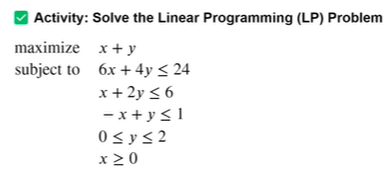

In [2]:
c = [-1,-1]
A_ub = [[6,4],[1,2],[-1,1]]
b_ub = [24,6,1]
bounds = [(0,None),(0,2)]

res = linprog(c=c,A_ub=A_ub,b_ub=b_ub,bounds= bounds, method='highs')
res


        message: Optimization terminated successfully. (HiGHS Status 7: Optimal)
        success: True
         status: 0
            fun: -4.5
              x: [ 3.000e+00  1.500e+00]
            nit: 2
          lower:  residual: [ 3.000e+00  1.500e+00]
                 marginals: [ 0.000e+00  0.000e+00]
          upper:  residual: [       inf  5.000e-01]
                 marginals: [ 0.000e+00  0.000e+00]
          eqlin:  residual: []
                 marginals: []
        ineqlin:  residual: [ 0.000e+00  0.000e+00  2.500e+00]
                 marginals: [-1.250e-01 -2.500e-01 -0.000e+00]
 mip_node_count: 0
 mip_dual_bound: 0.0
        mip_gap: 0.0

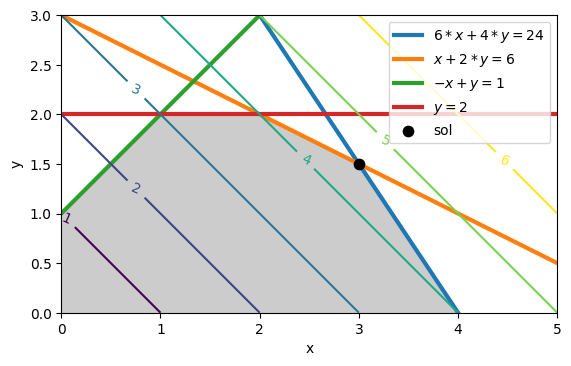

In [3]:
import sympy
import numpy as np
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1)
from sympy.plotting import plot
from sympy.abc import x, y
from sympy import solve, lambdify

l1 = lambdify(x, solve(6*x+4*y-24, y, dict=False)[0]) 
l2 = lambdify(x, solve(x+2*y-6, y, dict=False)[0]) 
l3 = lambdify(x, solve(-x+y-1, y, dict=False)[0]) 


x_args = np.linspace(0,5,200)
l4 = np.ones_like(x_args)*2

xx,yy = np.meshgrid(x_args,x_args)
img = ((6*xx+4*yy<=24) & (xx+2*yy<=6) & (-xx+yy<=1) & (xx >= 0) & (yy <= 2) & (yy >= 0))
extend = [xx.min(),xx.max(),yy.min(),yy.max()]
ax.imshow(img, extent=extend, alpha = 0.2, origin='lower', cmap='Greys')
ax.plot(x_args, l1(x_args), lw = 3, label=r'$6*x+4*y = 24$' )
ax.plot(x_args, l2(x_args), lw = 3, label=r'$x+2*y = 6$'    )
ax.plot(x_args, l3(x_args), lw = 3, label=r'$-x+y = 1$'     )
ax.plot(x_args, l4, lw = 3, label=r'$y = 2$')
obj = xx + yy
CS = ax.contour(xx,yy,obj, np.arange(1,7))
ax.clabel(CS, inline=1, fontsize = 10)
ax.scatter(*res.x.T, s = 55, c = 'k', label ='sol', zorder = 2)
ax.set_ylim(0,3)
plt.legend(loc=1);plt.xlabel('x');plt.ylabel('y');

In [4]:
res.x

array([3. , 1.5])